In [1]:
%matplotlib inline
from scipy import stats
import numpy as np
from matplotlib import pyplot as plt

## Non-Markovian methods
### Grid Search

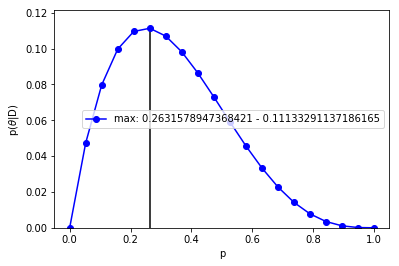

In [25]:
def posterior_grid(grid_points=100, heads=6, tosses=9):
    
    grid = np.linspace(0, 1, grid_points)
    prior = np.repeat(5,grid_points)
    likelihood = stats.binom.pmf(heads, tosses, grid)
    unstd_posterior = likelihood * prior
    posterior = unstd_posterior / unstd_posterior.sum()
    
    return posterior, grid

h, n = 1, 4
points = 20

posterior, grid = posterior_grid(points, h, n)
plt.plot(grid, posterior, 'bo-', label=f'max: {grid[np.argmax(posterior)]} - {posterior.max()}')
plt.xlabel('p')
plt.ylabel('p($\\theta$|D)')
plt.vlines([grid[np.argmax(posterior)]],0, [posterior.max()])
plt.ylim(0,posterior.max()+.01)
plt.legend()

## Markovian

### simple metropolis algorithm

(0, 1)

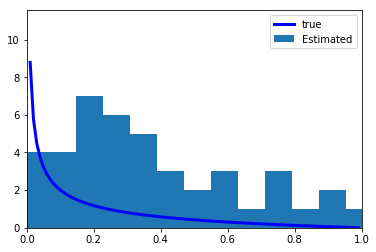

In [40]:
def metropolis(func, steps=100):
    
    samples = np.zeros(steps)
    old_x = func.mean()
    old_prob = func.pdf(old_x)
    
    for i in range(steps):
        new_x = old_x = np.random.normal(0,0.5)
        new_prob = func.pdf(new_x)
        acceptance = new_prob/old_prob
        
        if acceptance >= np.random.random():
            samples[i] = new_x
            old_x = new_x
            old_prob = new_prob
        else:
            samples[i] = old_x
    
    return samples

func = stats.beta(0.4,2)
samples = metropolis(func)
x = np.linspace(0.01,0.99,100)
y = func.pdf(x)

plt.plot(x,y,'b-', label='true', lw=3)
plt.hist(samples, bins=30, normed=False, label='Estimated')
plt.legend()
plt.xlim(0,1)